In [28]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Generate input data

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
x = 2 * np.random.randn(100,1)

In [31]:
y = 4 + 3* x + np.random.randn(100,1)

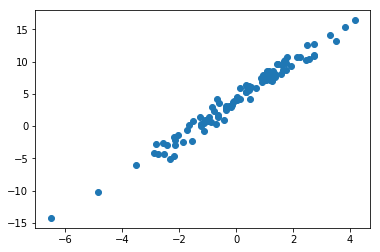

In [32]:
plt.plot(x,y,'o')
plt.show()

### Let's compute the coefficients using the normal equation.

We will use inv() function of numpy's linear aljebra module but before that we need to add extra ones to the matrix of x.

In [33]:
x_ones = np.c_[np.ones((100,1)),x]

In [34]:
x_ones

array([[ 1.        , -1.12398197],
       [ 1.        ,  0.36358273],
       [ 1.        , -2.18459098],
       [ 1.        ,  0.6925202 ],
       [ 1.        , -2.15512256],
       [ 1.        ,  3.81584382],
       [ 1.        ,  2.75024156],
       [ 1.        , -0.68383065],
       [ 1.        ,  0.36207148],
       [ 1.        ,  2.55725593],
       [ 1.        ,  1.19098334],
       [ 1.        ,  1.02769811],
       [ 1.        ,  0.89994244],
       [ 1.        , -0.83258137],
       [ 1.        ,  1.17386921],
       [ 1.        , -1.70866562],
       [ 1.        ,  0.46072806],
       [ 1.        ,  0.03317449],
       [ 1.        ,  1.76871429],
       [ 1.        ,  3.29245864],
       [ 1.        , -0.36542322],
       [ 1.        ,  2.72644089],
       [ 1.        , -2.73267569],
       [ 1.        , -0.99990054],
       [ 1.        ,  1.70557066],
       [ 1.        , -2.12764625],
       [ 1.        , -2.41443274],
       [ 1.        , -1.24886053],
       [ 1.        ,

### Let's calculate the coefficients.

Calculating inverse of x transpose x

In [35]:
np.linalg.inv(x_ones.T.dot(x_ones))

array([[ 0.01001458, -0.00020752],
       [-0.00020752,  0.00295275]])

To calculate the coefficients we need to multiply the inversed values of x transpose x with the multiplication of x transpose y

In [36]:
coeffs = np.linalg.inv(x_ones.T.dot(x_ones)).dot(x_ones.T).dot(y)

In [37]:
coeffs

array([[4.10633853],
       [2.9576447 ]])

3.97 is the value of intertcept and 3.03 is the coefficient of x

### Let's predict for new instances.

In [38]:
x_new = np.array([[0],[2]])

In [39]:
x_new

array([[0],
       [2]])

In [40]:
x_new_ones = np.c_[np.ones((2,1)),x_new]

In [41]:
x_new_ones

array([[1., 0.],
       [1., 2.]])

In [42]:
y_predict = x_new_ones.dot(coeffs)

In [43]:
y_predict

array([[ 4.10633853],
       [10.02162794]])

### Let's plot the predictions.

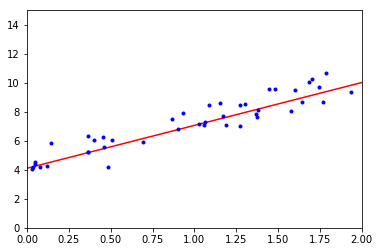

In [44]:
plt.plot(x_new,y_predict,"r-")
plt.plot(x,y,"b.")
plt.axis([0,2,0,15])
plt.show()

---

### Let's use sklearn and check the coefficients

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lin_reg = LinearRegression()

In [47]:
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
lin_reg.intercept_,lin_reg.coef_

(array([4.10633853]), array([[2.9576447]]))

The coefficients are exactly same.

### Let's predict using the fitted model and compare the values with the previous predictions

In [49]:
new_instances = np.array([[0],[2]])

In [50]:
lin_reg.predict(new_instances)

array([[ 4.10633853],
       [10.02162794]])

The predicted values are same as well.